In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
from google.colab import files

uploaded = files.upload()

Saving covid_19_data_tr3.csv to covid_19_data_tr3.csv


In [5]:
df= pd.read_csv("./covid_19_data_tr3.csv")

In [6]:
df.head()

,Province/State,Country/Region,Confirmed,Deaths,Recovered,Last_Update
0,NaN,Turkey,1,0,0,3/11/2020
1,NaN,Turkey,1,0,0,3/12/2020
2,NaN,Turkey,5,0,0,3/13/2020
3,NaN,Turkey,5,0,0,3/14/2020
4,NaN,Turkey,18,0,0,3/15/2020


In [7]:
df.tail(5)

,Province/State,Country/Region,Confirmed,Deaths,Recovered,Last_Update
107,NaN,Turkey,194511,5065,167198,6/26/2020
108,NaN,Turkey,195883,5082,169182,6/27/2020
109,NaN,Turkey,197239,5097,170595,6/28/2020
110,NaN,Turkey,198613,5115,171809,6/29/2020
111,NaN,Turkey,199906,5131,173111,6/30/2020


In [8]:
df.describe()

,Province/State,Confirmed,Deaths,Recovered
count,0.0,112.000000,112.000000,112.000000
mean,NaN,108117.875000,2860.151786,72165.455357
std,NaN,68611.789856,1897.802932,64281.501385
min,NaN,1.000000,0.000000,0.000000
25%,NaN,37196.750000,790.250000,1780.000000
50%,NaN,130617.500000,3552.000000,75743.500000
75%,NaN,165771.750000,4591.000000,130153.750000
max,NaN,199906.000000,5131.000000,173111.000000


In [9]:
df["Last_Update"]=pd.to_datetime(df["Last_Update"])

In [10]:
datewise=df.groupby(["Last_Update"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [11]:
fig=px.bar(x=datewise.index,y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
fig.update_layout(title="Aktif Vaka Sayısının Dağılımı",
                  xaxis_title="Date",yaxis_title="Vaka Sayısı",)
fig.show()

In [12]:
fig=px.bar(x=datewise.index,y=datewise["Deaths"])
fig.update_layout(title="Ölüm Sayısının Artışı",
                  xaxis_title="Date",yaxis_title="Ölüm Sayısı",)
fig.show()

In [13]:
fig=px.bar(x=datewise.index,y=datewise["Recovered"]+datewise["Deaths"])
fig.update_layout(title="Hastalığın Bittiği Vaka Sayısının Dağılımı",
                  xaxis_title="Date",yaxis_title="Vaka Sayısı",)
fig.show()

In [14]:
datewise["WeekOfYear"]=datewise.index.weekofyear

week_num=[]
weekwise_confirmed=[]
weekwise_recovered=[]
weekwise_deaths=[]

w=1
for i in list(datewise["WeekOfYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekOfYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekOfYear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekOfYear"]==i]["Deaths"].iloc[-1])
    week_num.append(w)
    w=w+1

Text(0.5, 1.0, 'Ölüm Sayısının Haftalık Artışı')

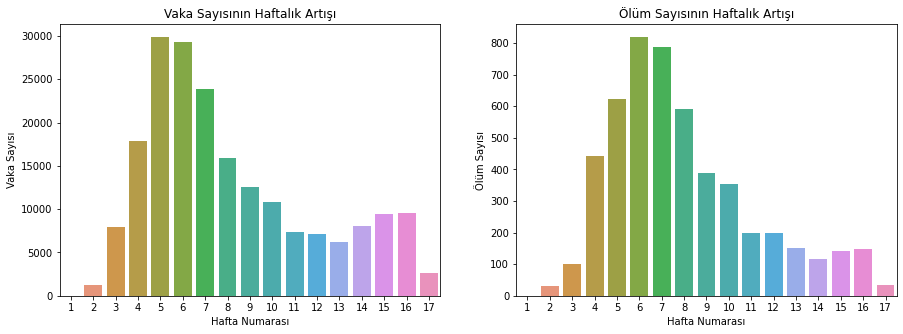

In [15]:
fig=go.Figure()
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(15,5))
sns.barplot(x=week_num,y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x=week_num,y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Hafta Numarası")
ax2.set_xlabel("Hafta Numarası")
ax1.set_ylabel("Vaka Sayısı")
ax2.set_ylabel("Ölüm Sayısı")
ax1.set_title("Vaka Sayısının Haftalık Artışı")
ax2.set_title("Ölüm Sayısının Haftalık Artışı")

In [17]:
from IPython.core.display import HTML

In [18]:
HTML('''<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/2042788" data-url="https://flo.uri.sh/visualisation/2042788/embed"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')